# The Sparks Foundation

## Data Science and Business Analytics (Task-1)

### Prediction Using Supervised ML - Student's-Scores

● Predict the percentage of an student based on the no. of study hours.

● This is a simple linear regression task as it involves just 2 variables.

● What will be predicted score if a student studies for 9.25 hrs/ day? 

● Data can be found at http://bit.ly/w-data

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [293]:
df = pd.read_csv('student_scores.csv')

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Data Types of Columns

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Descriptive Statistics

In [295]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [296]:
df.isna().sum().to_frame()

,0
Hours,0
Scores,0


#### Conclusion: No null or missing values to check. So we can proceed with building the model.

# Checking Distribution of the Numerical Variables

In [297]:
df['Hours'].skew()

0.1903382010052985

In [298]:
df['Scores'].skew()

0.2339646665397317

#### Conclusion: Both the numerical features have acceptable level of skewness. So, no transformation or scaling would be necessary.

<AxesSubplot:xlabel='Hours'>

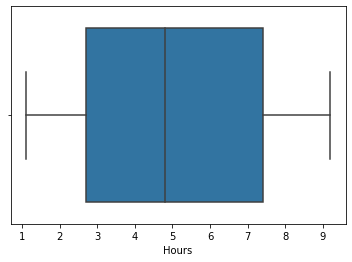

In [299]:
sns.boxplot(df['Hours'])

<AxesSubplot:xlabel='Scores'>

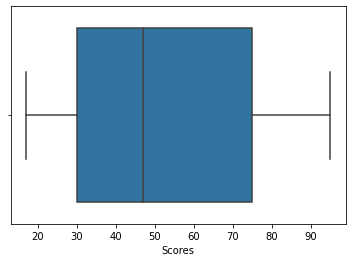

In [300]:
sns.boxplot(df['Scores'])

#### Conclusion : Outlier treatment is not necessary.

# Checking Correlation between the Numerical Variables.

<AxesSubplot:>

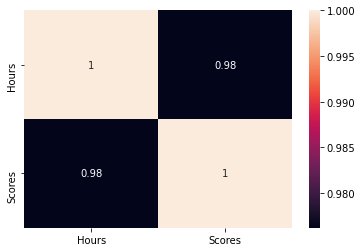

In [301]:
sns.heatmap(df.corr(),annot=True)

#### Conclusion : Above heatmap indicates significant positive correlation among the variables.

# Scatter Plot : Checking Spread of the Numerical Variables

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

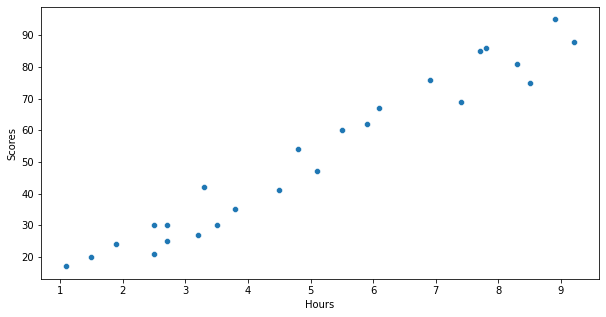

In [302]:
plt.figure(figsize=(10,5))
sns.scatterplot(df['Hours'],df['Scores'])


### Conclusion: From the scatterplot itself we get to know that there is a significant positive relation that exist between the varibles. But, we need to establish the linear model to justify the statement.

# 1st Approach : Linear Regression using Sklearn

In [303]:
from sklearn import set_config
set_config(display='diagram')

## Seperating data and target variables

In [304]:
x =df.drop('Scores',axis=1)  # Independent or Data variable

y= df['Scores']    # Dependent or Target variable

### Performing Train-Test Split of data

#### Note: 
##### 1.Train data and Test data ratio is taken as 4:1.

##### 2.Fixed Random state is used for consistent but random split strategy.

In [305]:
from sklearn.model_selection import train_test_split  

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=5)  

In [306]:
x_train.shape,x_test.shape  # Ratio is maintained in the train-test input data

((20, 1), (5, 1))

In [307]:
y_train.shape,y_test.shape # Ratio is maintained in the train-test output data

((20,), (5,))

## Fitting the model

In [308]:
import time

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

start = time.time()

model = lr.fit(x_train,y_train)

elapsed_time = time.time() - start

model


LinearRegression()

In [309]:
y_pred = lr.predict(x_test)

### Predicted target sample

In [310]:
(y_pred)

array([74.17493942, 61.68845724, 33.83399701, 77.0564353 , 49.20197507])

### Actual target sample

In [311]:
np.array(y_test)

array([69, 67, 27, 85, 54], dtype=int64)

## Fitting linear equation in the Scatter Plot

In [312]:
df['Scores_pred'] = model.intercept_ + (x * model.coef_)

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

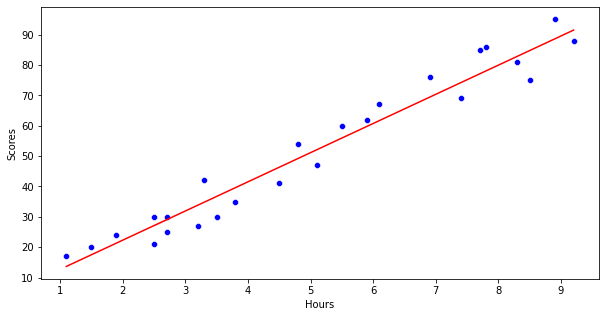

In [313]:
plt.figure(figsize=(10,5))
sns.scatterplot(df['Hours'],df['Scores'],color='b')
sns.lineplot(df['Hours'],df['Scores_pred'],color='r')

In [314]:
from sklearn import metrics

score  = model.score(x_test,y_test)

mae = metrics.mean_absolute_error(y_test,y_pred)

mse = metrics.mean_squared_error(y_test,y_pred)

fitting_time = elapsed_time

# Model Score and Error Evaluation Parameters

In [315]:
print('Model accuracy score: ',round(score,3))
print('Model fitting time: ', round(fitting_time,3),'seconds')
print('Model Mean Absolute Error: ', round(mae,3))
print('Model Mean Squared Error: ', round(mse,3))

Model accuracy score:  0.9
Model fitting time:  0.002 seconds
Model Mean Absolute Error:  6.012
Model Mean Squared Error:  37.563


# Prediction using Model

#### As given in the problem statement , we need to predict the score given the study hours is 9.25hrs /day

In [316]:
pred_score = model.predict(np.array([9.25]).reshape(1,-1))

print('Predicted score of the student who studied 9.25 hours/day is :',round(float(pred_score),3))

Predicted score of the student who studied 9.25 hours/day is : 91.944


# 2nd Approach :  Linear Regression using Statmodels.

### Now , we try to predict the target variable using statmodels approach.

In [317]:
df = pd.read_csv('student_scores.csv')

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Linear equation:
#### Scores = const + m * Hours
    
   

In [318]:
import statsmodels.api as sm

In [319]:
x =df.drop('Scores',axis=1)  # Independent or Data variable

y= df['Scores']    # Dependent or Target variable

In [320]:
xc = sm.add_constant(x)

In [321]:
model = sm.OLS(y,xc).fit()

In [322]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           9.13e-17
Time:                        21:27:52   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion : Based on the R-squared value(0.953) and P|t|>0 value(0.000),we can confirm that Hours is significant predictor for Scores.

# Linear equation after getting slope and intercept from model summary

#### Scores  = 2.4837 + 9.7758 * Hours 

In [323]:
df['Pred_score'] = 2.4837 + 9.7758 * df['Hours']

## Fitting linear equation in the Scatter Plot

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

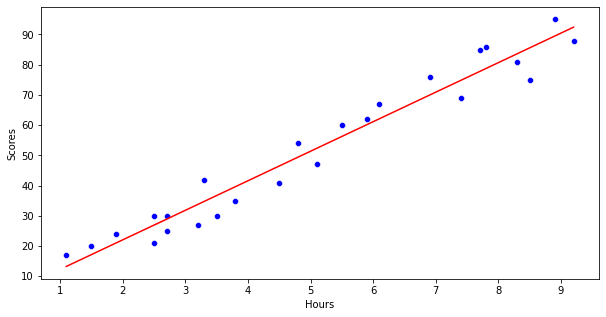

In [324]:
plt.figure(figsize=(10,5))
sns.scatterplot(df['Hours'],df['Scores'],color='b')
sns.lineplot(df['Hours'],df['Pred_score'],color='r')

#### Given in the problem statement, we need to predict Score for Hours given as 9.25

In [325]:
Hours = 9.25

Scores  = 2.4837 + 9.7758 * Hours 

print('Predicted score of the student who studied 9.25 hours/day is :',round(float(Scores),3))

Predicted score of the student who studied 9.25 hours/day is : 92.91
